In [121]:
import random
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List, Dict

In [122]:
class AgentState(TypedDict):
    name:str
    number: List[int]
    counter: int

In [123]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting node"""
    state["name"] = f"Hello, {state['name']}!"
    state["counter"] = 0
    return state

def random_node(state: AgentState) -> AgentState:
    """Generate a random number from 1 to 10"""
    state["number"].append(random.randint(1, 10))
    state["counter"] += 1
    return state

def should_continue(state: AgentState) -> AgentState:
    """Function to decide what to do next"""
    if state["counter"] < 5:
        print("Enter into a loop " , state["counter"])
        return "loop"
    else:
        return "exit"

In [124]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random_number", random_node)

graph.add_edge("greeting", "random_number")

graph.add_conditional_edges(
    "random_number",
    should_continue,
    {
        "loop": "random_number",
        "exit": END
    }
)

graph.set_entry_point("greeting")

app = graph.compile()

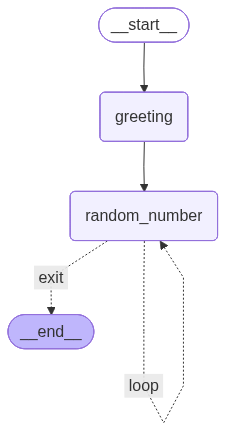

In [125]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [126]:
result = app.invoke({"name":"Alvaro", "number":[]})

print(result)

Enter into a loop  1
Enter into a loop  2
Enter into a loop  3
Enter into a loop  4
{'name': 'Hello, Alvaro!', 'number': [10, 8, 2, 3, 4], 'counter': 5}
